In [112]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import statsmodels.api as sm

In [2]:
data=pd.read_csv("C:/Users/Dell/Downloads/datascience/hackathon/dataset.csv")

In [9]:
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 3   EURO AREA - EURO/US$                       5217 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 6   BRAZIL - REAL/US$                          5217 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object
 8   CHINA - YUAN/US$                           5217 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

In [18]:
data=data.rename(columns={'AUSTRALIA - AUSTRALIAN DOLLAR/US$':'AUSTRALIA','EURO AREA - EURO/US$':'EURO'})

In [28]:
data=data.rename(columns={'INDIA - INDIAN RUPEE/US$':'INDIA','KOREA - WON/US$':'KOREA','MEXICO - MEXICAN PESO/US$':'MEXICO','SOUTH AFRICA - RAND/US$':'SOUTH AFRICA','SINGAPORE - SINGAPORE DOLLAR/US$':'SINGAPORE','DENMARK - DANISH KRONE/US$':'DENMARK','JAPAN - YEN/US$':'JAPAN','MALAYSIA - RINGGIT/US$':'MALAYSIA','NORWAY - NORWEGIAN KRONE/US$':'NORWAY','SWEDEN - KRONA/US$':'SWEDEN','SRI LANKA - SRI LANKAN RUPEE/US$':'SRI LANKA','SWITZERLAND - FRANC/US$':'SWITZERLAND','TAIWAN - NEW TAIWAN DOLLAR/US$':'TAIWAN','THAILAND - BAHT/US$':'THAILAND'})

In [29]:
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA,EURO,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5217 non-null   int64 
 1   Time Serie      5217 non-null   object
 2   AUSTRALIA       5217 non-null   object
 3   EURO            5217 non-null   object
 4   NEW ZEALAND     5217 non-null   object
 5   UNITED KINGDOM  5217 non-null   object
 6   BRAZIL          5217 non-null   object
 7   CANADA          5217 non-null   object
 8   CHINA           5217 non-null   object
 9   HONG            5217 non-null   object
 10  INDIA           5217 non-null   object
 11  KOREA           5217 non-null   object
 12  MEXICO          5217 non-null   object
 13  SOUTH AFRICA    5217 non-null   object
 14  SINGAPORE       5217 non-null   object
 15  DENMARK         5217 non-null   object
 16  JAPAN           5217 non-null   object
 17  MALAYSIA        5217 non-null   object
 18  NORWAY  

In [31]:
data.THAILAND=data.THAILAND.replace("ND",np.nan)

In [36]:
data.TAIWAN=data.TAIWAN.replace("ND",np.nan)
data.SWITZERLAND=data.SWITZERLAND.replace("ND",np.nan)
data["SRI LANKA"]=data["SRI LANKA"].replace("ND",np.nan)
data.SWEDEN=data.SWEDEN.replace("ND",np.nan)
data.NORWAY=data.NORWAY.replace("ND",np.nan)
data.MALAYSIA=data.MALAYSIA.replace("ND",np.nan)
data.JAPAN=data.JAPAN.replace("ND",np.nan)
data.DENMARK=data.DENMARK.replace("ND",np.nan)
data.SINGAPORE=data.SINGAPORE.replace("ND",np.nan)
data.MEXICO=data.MEXICO.replace("ND",np.nan)
data.INDIA=data.INDIA.replace("ND",np.nan)
data.CHINA=data.CHINA.replace("ND",np.nan)
data.HONG=data.HONG.replace("ND",np.nan)
data.CANADA=data.CANADA.replace("ND",np.nan)
data.BRAZIL=data.BRAZIL.replace("ND",np.nan)
data["UNITED KINGDOM"]=data["UNITED KINGDOM"].replace("ND",np.nan)
data["NEW ZEALAND"]=data["NEW ZEALAND"].replace("ND",np.nan)
data.EURO=data.EURO.replace("ND",np.nan)
data.AUSTRALIA=data.AUSTRALIA.replace("ND",np.nan)

In [37]:
data.AUSTRALIA=data.AUSTRALIA.astype('float')

In [38]:
data.TAIWAN=data.TAIWAN.astype('float')
data.SWITZERLAND=data.SWITZERLAND.astype('float')
data["SRI LANKA"]=data["SRI LANKA"].astype('float')
data.SWEDEN=data.SWEDEN.astype('float')
data.NORWAY=data.NORWAY.astype('float')
data.MALAYSIA=data.MALAYSIA.astype('float')
data.JAPAN=data.JAPAN.astype('float')
data.DENMARK=data.DENMARK.astype('float')
data.SINGAPORE=data.SINGAPORE.astype('float')
data.MEXICO=data.MEXICO.astype('float')
data.INDIA=data.INDIA.astype('float')
data.CHINA=data.CHINA.astype('float')
data.HONG=data.HONG.astype('float')
data.CANADA=data.CANADA.astype('float')
data.BRAZIL=data.BRAZIL.astype('float')
data["UNITED KINGDOM"]=data["UNITED KINGDOM"].astype('float')
data["NEW ZEALAND"]=data["NEW ZEALAND"].astype('float')
data.EURO=data.EURO.astype('float')
data.THAILAND=data.THAILAND.astype('float')

In [40]:
data['THAILAND'].fillna(data['THAILAND'].mean(),inplace=True)

In [43]:
data['EURO'].fillna(data['EURO'].mean(),inplace=True)
data['NEW ZEALAND'].fillna(data['NEW ZEALAND'].mean(),inplace=True)
data['UNITED KINGDOM'].fillna(data['UNITED KINGDOM'].mean(),inplace=True)
data['BRAZIL'].fillna(data['BRAZIL'].mean(),inplace=True)
data['CANADA'].fillna(data['CANADA'].mean(),inplace=True)
data['HONG'].fillna(data['HONG'].mean(),inplace=True)
data['CHINA'].fillna(data['CHINA'].mean(),inplace=True)
data['INDIA'].fillna(data['INDIA'].mean(),inplace=True)
data['MEXICO'].fillna(data['MEXICO'].mean(),inplace=True)
data['SINGAPORE'].fillna(data['SINGAPORE'].mean(),inplace=True)
data['DENMARK'].fillna(data['DENMARK'].mean(),inplace=True)
data['JAPAN'].fillna(data['JAPAN'].mean(),inplace=True)
data['MALAYSIA'].fillna(data['MALAYSIA'].mean(),inplace=True)
data['NORWAY'].fillna(data['NORWAY'].mean(),inplace=True)
data['SWEDEN'].fillna(data['SWEDEN'].mean(),inplace=True)
data['SRI LANKA'].fillna(data['SRI LANKA'].mean(),inplace=True)
data['SWITZERLAND'].fillna(data['SWITZERLAND'].mean(),inplace=True)
data['TAIWAN'].fillna(data['TAIWAN'].mean(),inplace=True)
data['AUSTRALIA'].fillna(data['AUSTRALIA'].mean(),inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5217 non-null   int64  
 1   Time Serie      5217 non-null   object 
 2   AUSTRALIA       5217 non-null   float64
 3   EURO            5217 non-null   float64
 4   NEW ZEALAND     5217 non-null   float64
 5   UNITED KINGDOM  5217 non-null   float64
 6   BRAZIL          5217 non-null   float64
 7   CANADA          5217 non-null   float64
 8   CHINA           5217 non-null   float64
 9   HONG            5217 non-null   float64
 10  INDIA           5217 non-null   float64
 11  KOREA           5217 non-null   object 
 12  MEXICO          5217 non-null   float64
 13  SOUTH AFRICA    5217 non-null   object 
 14  SINGAPORE       5217 non-null   float64
 15  DENMARK         5217 non-null   float64
 16  JAPAN           5217 non-null   float64
 17  MALAYSIA        5217 non-null   f

In [47]:
data.KOREA=data.KOREA.replace("ND",np.nan)
data["SOUTH AFRICA"]=data["SOUTH AFRICA"].replace("ND",np.nan)

In [48]:
data.KOREA=data.KOREA.astype('float')
data["SOUTH AFRICA"]=data["SOUTH AFRICA"].astype('float')

In [49]:
data['KOREA'].fillna(data['KOREA'].mean(),inplace=True)
data['SOUTH AFRICA'].fillna(data['SOUTH AFRICA'].mean(),inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5217 non-null   int64  
 1   Time Serie      5217 non-null   object 
 2   AUSTRALIA       5217 non-null   float64
 3   EURO            5217 non-null   float64
 4   NEW ZEALAND     5217 non-null   float64
 5   UNITED KINGDOM  5217 non-null   float64
 6   BRAZIL          5217 non-null   float64
 7   CANADA          5217 non-null   float64
 8   CHINA           5217 non-null   float64
 9   HONG            5217 non-null   float64
 10  INDIA           5217 non-null   float64
 11  KOREA           5217 non-null   float64
 12  MEXICO          5217 non-null   float64
 13  SOUTH AFRICA    5217 non-null   float64
 14  SINGAPORE       5217 non-null   float64
 15  DENMARK         5217 non-null   float64
 16  JAPAN           5217 non-null   float64
 17  MALAYSIA        5217 non-null   f

In [58]:
data.head()

,Unnamed: 0,Time Serie,AUSTRALIA,EURO,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10
3,3,2000-01-06,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      5217 non-null   int64         
 1   Time Serie      5217 non-null   datetime64[ns]
 2   AUSTRALIA       5217 non-null   float64       
 3   EURO            5217 non-null   float64       
 4   NEW ZEALAND     5217 non-null   float64       
 5   UNITED KINGDOM  5217 non-null   float64       
 6   BRAZIL          5217 non-null   float64       
 7   CANADA          5217 non-null   float64       
 8   CHINA           5217 non-null   float64       
 9   HONG            5217 non-null   float64       
 10  INDIA           5217 non-null   float64       
 11  KOREA           5217 non-null   float64       
 12  MEXICO          5217 non-null   float64       
 13  SOUTH AFRICA    5217 non-null   float64       
 14  SINGAPORE       5217 non-null   float64       
 15  DENM

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
data.isna().sum()

Unnamed: 0        0
Time Serie        0
AUSTRALIA         0
EURO              0
NEW ZEALAND       0
UNITED KINGDOM    0
BRAZIL            0
CANADA            0
CHINA             0
HONG              0
INDIA             0
KOREA             0
MEXICO            0
SOUTH AFRICA      0
SINGAPORE         0
DENMARK           0
JAPAN             0
MALAYSIA          0
NORWAY            0
SWEDEN            0
SRI LANKA         0
SWITZERLAND       0
TAIWAN            0
THAILAND          0
dtype: int64

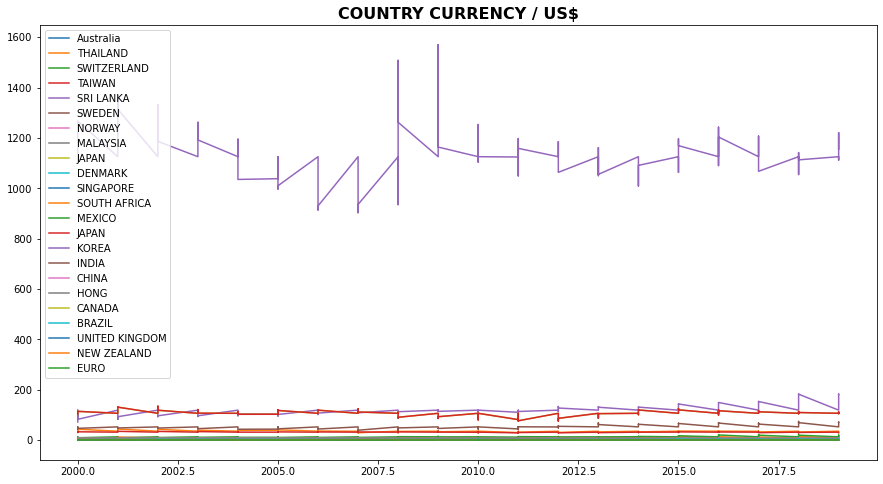

In [87]:
plt.figure(figsize=(15,8))
x=data['Time Serie'].dt.year
y=data['AUSTRALIA']

plt.plot(x,y,label="Australia")
plt.plot(x,data['THAILAND'],label="THAILAND")
plt.plot(x,data['SWITZERLAND'],label="SWITZERLAND")
plt.plot(x,data['TAIWAN'],label="TAIWAN")
plt.plot(x,data['SRI LANKA'],label="SRI LANKA")
plt.plot(x,data['SWEDEN'],label="SWEDEN")
plt.plot(x,data['NORWAY'],label="NORWAY")
plt.plot(x,data['MALAYSIA'],label="MALAYSIA")
plt.plot(x,data['JAPAN'],label="JAPAN")
plt.plot(x,data['DENMARK'],label="DENMARK")
plt.plot(x,data['SINGAPORE'],label="SINGAPORE")
plt.plot(x,data['SOUTH AFRICA'],label="SOUTH AFRICA")
plt.plot(x,data['MEXICO'],label="MEXICO")
plt.plot(x,data['JAPAN'],label="JAPAN")
plt.plot(x,data['KOREA'],label="KOREA")
plt.plot(x,data['INDIA'],label="INDIA")
plt.plot(x,data['CHINA'],label="CHINA")
plt.plot(x,data['HONG'],label="HONG")
plt.plot(x,data['CANADA'],label="CANADA")
plt.plot(x,data['BRAZIL'],label="BRAZIL")
plt.plot(x,data['UNITED KINGDOM'],label="UNITED KINGDOM")
plt.plot(x,data['NEW ZEALAND'],label="NEW ZEALAND")
plt.plot(x,data['EURO'],label="EURO")
plt.legend(loc="upper left")
plt.title("COUNTRY CURRENCY / US$", fontsize=16, fontweight='bold')
plt.show()

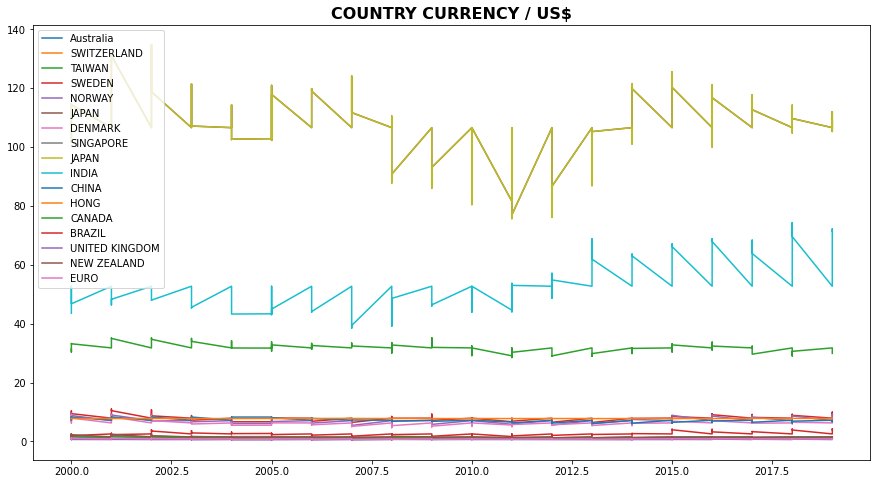

In [89]:
plt.figure(figsize=(15,8))
x=data['Time Serie'].dt.year
y=data['AUSTRALIA']

plt.plot(x,y,label="Australia")

plt.plot(x,data['SWITZERLAND'],label="SWITZERLAND")
plt.plot(x,data['TAIWAN'],label="TAIWAN")

plt.plot(x,data['SWEDEN'],label="SWEDEN")
plt.plot(x,data['NORWAY'],label="NORWAY")

plt.plot(x,data['JAPAN'],label="JAPAN")
plt.plot(x,data['DENMARK'],label="DENMARK")
plt.plot(x,data['SINGAPORE'],label="SINGAPORE")

plt.plot(x,data['JAPAN'],label="JAPAN")

plt.plot(x,data['INDIA'],label="INDIA")
plt.plot(x,data['CHINA'],label="CHINA")
plt.plot(x,data['HONG'],label="HONG")
plt.plot(x,data['CANADA'],label="CANADA")
plt.plot(x,data['BRAZIL'],label="BRAZIL")
plt.plot(x,data['UNITED KINGDOM'],label="UNITED KINGDOM")
plt.plot(x,data['NEW ZEALAND'],label="NEW ZEALAND")
plt.plot(x,data['EURO'],label="EURO")
plt.legend(loc="upper left")
plt.title("COUNTRY CURRENCY / US$", fontsize=16, fontweight='bold')
plt.show()

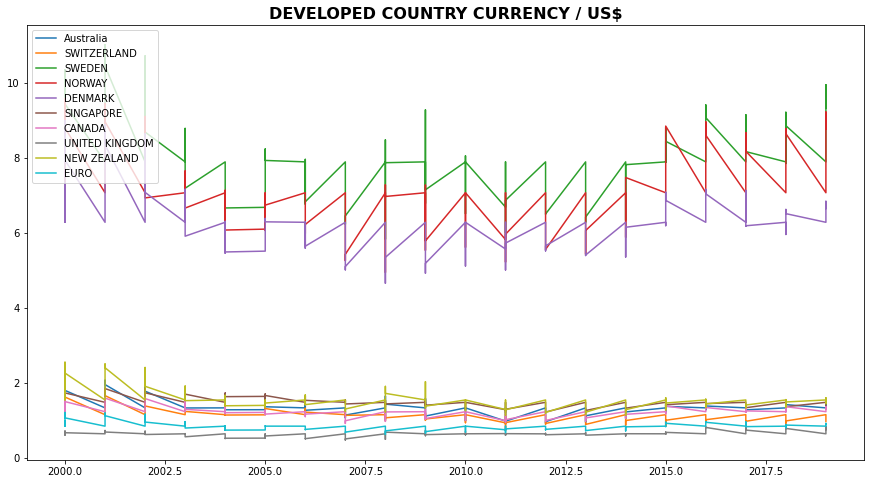

In [93]:
plt.figure(figsize=(15,8))
x=data['Time Serie'].dt.year
y=data['AUSTRALIA']

plt.plot(x,y,label="Australia")

plt.plot(x,data['SWITZERLAND'],label="SWITZERLAND")


plt.plot(x,data['SWEDEN'],label="SWEDEN")
plt.plot(x,data['NORWAY'],label="NORWAY")


plt.plot(x,data['DENMARK'],label="DENMARK")
plt.plot(x,data['SINGAPORE'],label="SINGAPORE")




plt.plot(x,data['CANADA'],label="CANADA")

plt.plot(x,data['UNITED KINGDOM'],label="UNITED KINGDOM")
plt.plot(x,data['NEW ZEALAND'],label="NEW ZEALAND")
plt.plot(x,data['EURO'],label="EURO")
plt.legend(loc="upper left")
plt.title("DEVELOPED COUNTRY CURRENCY / US$", fontsize=16, fontweight='bold')
plt.show()

In [97]:
dt=data.describe().T


In [98]:
dt

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5217.0,2608.000000,1506.162508,0.0000,1304.0000,2608.000000,3912.0000,5216.0000
AUSTRALIA,5217.0,1.332015,0.264745,0.9069,1.1210,1.316300,1.4243,2.0713
EURO,5217.0,0.843904,0.124406,0.6246,0.7530,0.822800,0.8973,1.2092
NEW ZEALAND,5217.0,1.543683,0.330854,1.1346,1.3300,1.450300,1.5810,2.5510
UNITED KINGDOM,5217.0,0.640372,0.081028,0.4738,0.5938,0.638600,0.6902,0.8287
BRAZIL,5217.0,2.547928,0.710337,1.5375,1.9590,2.354000,3.1165,4.2594
CANADA,5217.0,1.230338,0.178669,0.9168,1.0608,1.230338,1.3325,1.6128
CHINA,5217.0,7.200820,0.804513,6.0402,6.4925,6.880300,8.2765,8.2800
HONG,5217.0,7.782638,0.027016,7.7085,7.7568,7.782638,7.7997,7.8499
INDIA,5217.0,52.718519,9.494516,38.4800,45.3200,48.400000,62.1300,74.3300


In [100]:
dt=dt.loc[:,"mean"]

In [101]:
dt=dt.drop("Unnamed: 0")

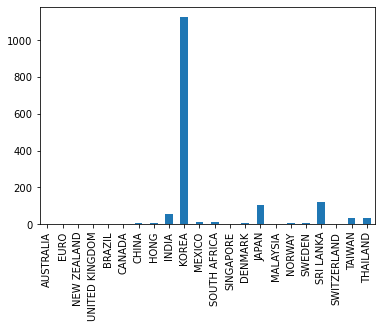

In [102]:
dt.plot(kind="bar")

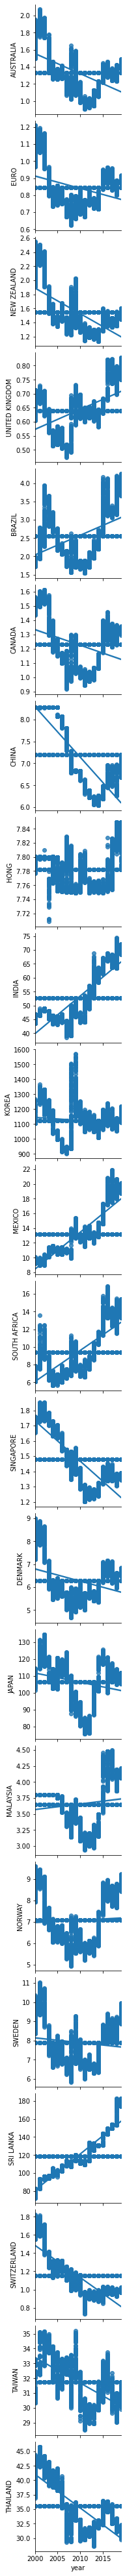

In [110]:
dm=data.describe().T
data['year']=data['Time Serie'].dt.year
sns.pairplot(data=data,kind="reg",y_vars=('AUSTRALIA','EURO','NEW ZEALAND','UNITED KINGDOM','BRAZIL','CANADA','CHINA','HONG','INDIA','KOREA','MEXICO','SOUTH AFRICA','SINGAPORE','DENMARK','JAPAN','MALAYSIA','NORWAY','SWEDEN','SRI LANKA','SWITZERLAND','TAIWAN','THAILAND'),x_vars=('year'))

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      5217 non-null   int64         
 1   Time Serie      5217 non-null   datetime64[ns]
 2   AUSTRALIA       5217 non-null   float64       
 3   EURO            5217 non-null   float64       
 4   NEW ZEALAND     5217 non-null   float64       
 5   UNITED KINGDOM  5217 non-null   float64       
 6   BRAZIL          5217 non-null   float64       
 7   CANADA          5217 non-null   float64       
 8   CHINA           5217 non-null   float64       
 9   HONG            5217 non-null   float64       
 10  INDIA           5217 non-null   float64       
 11  KOREA           5217 non-null   float64       
 12  MEXICO          5217 non-null   float64       
 13  SOUTH AFRICA    5217 non-null   float64       
 14  SINGAPORE       5217 non-null   float64       
 15  DENM

In [134]:
dm=data.drop(columns=['Time Serie'])

In [132]:
dm=data.drop(columns=['Unnamed: 0'])

In [135]:
dm.head()

,Unnamed: 0,AUSTRALIA,EURO,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG,INDIA,...,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND,year
0,0,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,43.55,...,7.3290,101.70,3.8,7.964,8.4430,72.30,1.5808,31.38,36.97,2000
1,1,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,7.2180,103.09,3.8,7.934,8.3600,72.65,1.5565,30.60,37.13,2000
2,2,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,43.55,...,7.2080,103.77,3.8,7.935,8.3530,72.95,1.5526,30.80,37.10,2000
3,3,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,43.55,...,7.2125,105.19,3.8,7.940,8.3675,72.95,1.5540,31.75,37.62,2000
4,4,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,43.55,...,7.2285,105.17,3.8,7.966,8.4150,73.15,1.5623,30.85,37.30,2000


Text(0.5, 1.0, 'Australia/ US $ vs Euro / US $ ')

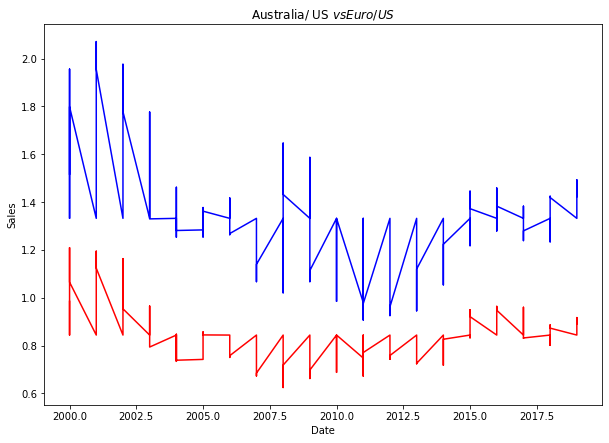

In [152]:
plt.figure(figsize=(10,7))
plt.plot(data['year'], data['AUSTRALIA'], 'b-')
plt.plot(data['year'], data['EURO'], 'r-')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Australia/ US $ vs Euro / US $ ')
